# Task 0
- Single output neuron, standard synapse model, Oja rule, stationary input statistics.

In [43]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random

In [44]:
N = 10 # number of presynaptic neurons
w0 = random.randn(N)/np.sqrt(N) # weight vector
e1 = random.randn(N, 1) # first principal component of covariance
e2 = random.randn(N, 1) 
e2 = e2 - (e2.T.dot(e1).item()/e1.T.dot(e1).item())*e1 # second principal component of covariance
a = 0.1
Q = e1.dot(e1.T) + a * np.identity(N) # covariance matrix
mu = np.zeros(N) # mean
tau_w = 300 # time constant for weight updates
T = 100 # number of simulation time steps
dt = 0.1 # time step length
alpha = 1

In [45]:
U = []
W = []
W_norm = []
w = w0

for t in np.arange(0, T, dt):
    u = random.multivariate_normal(mu, Q)
    v = u.dot(w)
    w = w + (1/tau_w) * (v*u - alpha*(v**2)*w)
    U.append(u)
    W.append(w)
    W_norm.append(np.sqrt(w.T.dot(w)))


U = np.array(U)
W = np.array(W)
W_norm = np.array(W_norm)

In [46]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

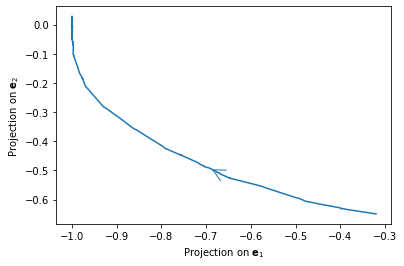

In [47]:
U1 = U.dot(e1)/np.sqrt(e1.T.dot(e1)) # projections on first principal component
U2 = U.dot(e2)/np.sqrt(e2.T.dot(e2))
W1 = W.dot(e1)/np.sqrt(e1.T.dot(e1))
W2 = W.dot(e2)/np.sqrt(e2.T.dot(e2))

f0= plt.figure(0)
trace = plt.plot(W1, W2)[0]
plt.xlabel('Projection on $\mathbf{e}_1$')
plt.ylabel('Projection on $\mathbf{e}_2$')

add_arrow(trace, position=0.5*(np.max(W1) + np.min(W1)), size=30)

Text(0, 0.5, '$|\\mathbf{w}|$')

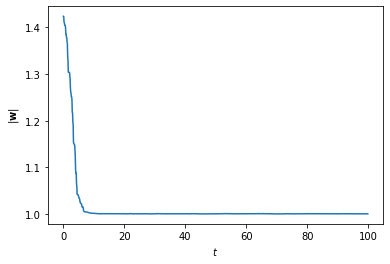

In [48]:
f1 = plt.figure(1)
plt.plot(np.arange(0, T, dt), W_norm)

plt.xlabel('$t$')
plt.ylabel('$|\mathbf{w}|$')

Text(0, 0.5, '$\\cos(\\theta)$')

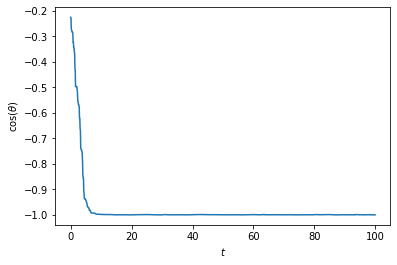

In [49]:
f2 = plt.figure(2)
plt.plot(np.arange(0, T, dt), W1.squeeze()/W_norm)

plt.xlabel('$t$')
plt.ylabel('$\cos(\\theta)$')